<a href="https://colab.research.google.com/github/fiza-azam/Advanced-Computer-Vision/blob/main/Instance_Segmentation_Nucleus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from PIL import Image

#Data Exploration

In [ ]:
# !unzip "/content/drive/MyDrive/CV Project/CPM17.zip" -d "/content/drive/MyDrive/CV Project/CPM17"

Archive:  /content/drive/MyDrive/CV Project/CPM17.zip
  inflating: /content/drive/MyDrive/CV Project/CPM17/cpm17/train/Images/image_31.png  
  inflating: /content/drive/MyDrive/CV Project/CPM17/cpm17/train/Images/image_12.png  
  inflating: /content/drive/MyDrive/CV Project/CPM17/cpm17/train/Images/image_24.png  
  inflating: /content/drive/MyDrive/CV Project/CPM17/cpm17/train/Images/image_14.png  
  inflating: /content/drive/MyDrive/CV Project/CPM17/cpm17/train/Images/image_29.png  
  inflating: /content/drive/MyDrive/CV Project/CPM17/cpm17/train/Images/image_16.png  
  inflating: /content/drive/MyDrive/CV Project/CPM17/cpm17/train/Images/image_10.png  
  inflating: /content/drive/MyDrive/CV Project/CPM17/cpm17/train/Images/image_15.png  
  inflating: /content/drive/MyDrive/CV Project/CPM17/cpm17/train/Images/image_22.png  
  inflating: /content/drive/MyDrive/CV Project/CPM17/cpm17/train/Images/image_23.png  
  inflating: /content/drive/MyDrive/CV Project/CPM17/cpm17/train/Images/imag

In [ ]:
# !unzip "/content/drive/MyDrive/CV Project/CoNSeP.zip" -d "/content/drive/MyDrive/CV Project/CoNSeP"

Archive:  /content/drive/MyDrive/CV Project/CoNSeP.zip
   creating: /content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/
   creating: /content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/.ipynb_checkpoints/
  inflating: /content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/.ipynb_checkpoints/create_dataset-checkpoint.ipynb  
  inflating: /content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/.DS_Store  
   creating: /content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/Train/
  inflating: /content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/Train/.DS_Store  
   creating: /content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/Train/Overlay/
  inflating: /content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/Train/Overlay/train_10.png  
  inflating: /content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/Train/Overlay/train_25.png  
  inflating: /content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/Train/Overlay/train_16.png  
  inflating: /content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/Train/Overlay/train_24.png  
  inflating: /content/drive/MyDr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# scipy.io libarary to load MatLab files
import scipy.io as scpio
from scipy.ndimage import median_filter

In [ ]:
train_dir = '/content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/Train'
test_dir = '/content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/Test'

train_images = sorted(os.listdir(train_dir + '/Images'))
test_images = sorted(os.listdir(test_dir + '/Images'))
train_ground_truth = sorted(os.listdir(train_dir + '/Labels'))
test_ground_truth = sorted(os.listdir(test_dir + '/Labels'))

print(train_images[:5])
print(train_ground_truth[:5])
print('length of trian set: %s'%len(train_images))
print('length of test set: %s'%len(test_images))

['train_1.png', 'train_10.png', 'train_11.png', 'train_12.png', 'train_13.png']
['train_1.mat', 'train_10.mat', 'train_11.mat', 'train_12.mat', 'train_13.mat']
length of trian set: 27
length of test set: 14


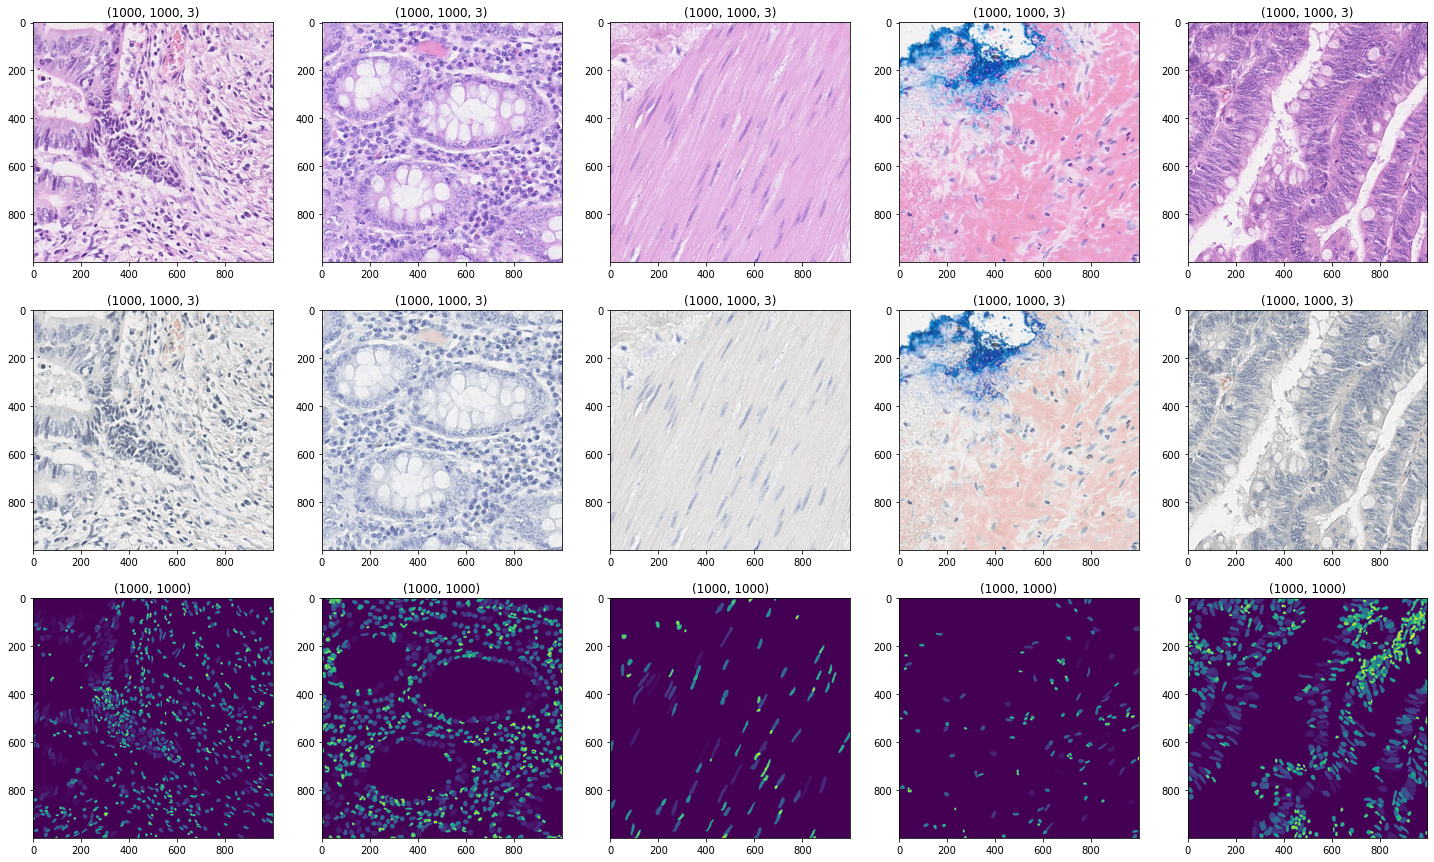

In [ ]:

# scipy.io libarary to load MatLab files
import scipy.io as scpio
from scipy.ndimage import median_filter

plt.figure(figsize=(25,15))
for i in range(5):
    plt.subplot(3,5,i+1)
    img = plt.imread(os.path.join(train_dir+'/Images/',train_images[i]))
    plt.title(img.shape)
    plt.imshow(img)

    plt.subplot(3,5,i+6)
    img = median_filter(img,size = 3)
    plt.title(img.shape)
    plt.imshow(img)

    # type_map of the image
    plt.subplot(3,5,i+11)
    img_type_map = scpio.loadmat(os.path.join(train_dir+'/Labels/',train_ground_truth[i]))['inst_map']
    plt.title(img_type_map.shape)
    plt.imshow(img_type_map)

In [ ]:
vasls = scpio.loadmat(os.path.join(train_dir+'/Labels/',train_ground_truth[i]))

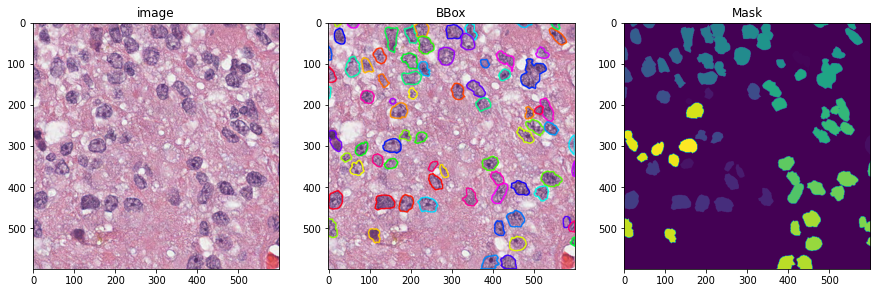

In [ ]:
mask = plt.imread('/content/drive/MyDrive/CV Project/CPM17/cpm17/test/Overlay/image_00.png')
img = plt.imread('/content/drive/MyDrive/CV Project/CPM17/cpm17/test/Images/image_00.png')
mat = scpio.loadmat('/content/drive/MyDrive/CV Project/CPM17/cpm17/test/Labels/image_00.mat')['inst_map']

plt.figure(figsize=(15, 15))
plt.subplot(1,3,1)
plt.title('image')
plt.imshow(img)
plt.subplot(1,3,2)
plt.title('BBox')
plt.imshow(mask)
plt.subplot(1,3,3)
plt.title('Mask')
plt.imshow(mat)
plt.show()

In [ ]:
def plotData(dataFrame):
  img = plt.imread(dataFrame['Images'].values[0])
  mask = plt.imread(dataFrame['Overlay'].values[0])
  label =  scpio.loadmat(dataFrame['Labels'].values[0])['inst_map']

  plt.figure(figsize=(15, 15))
  plt.subplot(1,3,1)
  plt.title('image')
  plt.imshow(img)
  plt.subplot(1,3,2)
  plt.title('BBox')
  plt.imshow(mask)
  plt.subplot(1,3,3)
  plt.title('Mask')
  plt.imshow(label)
  plt.show()

In [ ]:
def readPath(dir):
  pathList = []
  path =  os.listdir(dir)
  for address in path:
    pathList.append(dir+'/'+address)
  pathList = sorted(pathList) 
  return pathList

In [ ]:
def mergeData(file1, file2):
  image1 = readPath(file1+"Images")
  image2 = readPath(file2+"Images")
  labels1 = readPath(file1+"Labels")
  labels2 = readPath(file2+"Labels")
  overlay1 = readPath(file1+"Overlay")
  overlay2 = readPath(file2+"Overlay")

  df1 = pd.DataFrame()
  df2 = pd.DataFrame()


  df1["Images"] = image1
  df1["Labels"] = labels1
  df1["Overlay"] = overlay1

  
  df2["Images"] = image2
  df2["Labels"] = labels2
  df2["Overlay"] = overlay2

  df3 = df1.append(df2, ignore_index=True)

  return df3  

In [ ]:
test = mergeData('/content/drive/MyDrive/CV Project/CPM17/cpm17/test/', '/content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/Test/')

In [ ]:
test

Images  \
0   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
1   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
2   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
3   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
4   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
5   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
6   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
7   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
8   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
9   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
10  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
11  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
12  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
13  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
14  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
15  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
16  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
17  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
18  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
19  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
20  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
21  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
22  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
23  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
24  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
25  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
26  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
27  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
28  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
29  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
30  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
31  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
32  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
33  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
34  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
35  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
36  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
37  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
38  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
39  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
40  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
41  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
42  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
43  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
44  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
45  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   

                                               Labels  \
0   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
1   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
2   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
3   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
4   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
5   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
6   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
7   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
8   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
9   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
10  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
11  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
12  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
13  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
14  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
15  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
16  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
17  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
18  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
19  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
20  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
21  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
22  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   

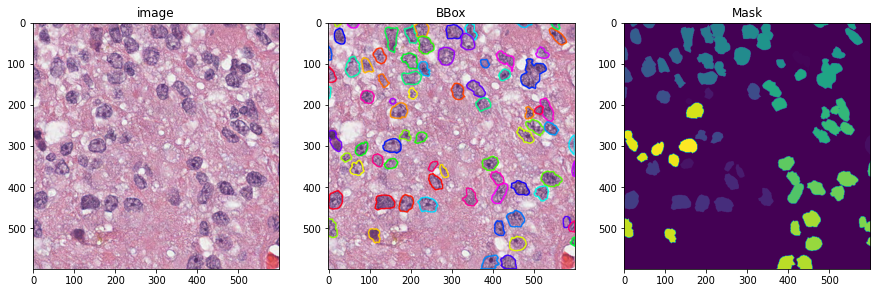

In [ ]:
plotData(test)

In [ ]:
train = mergeData('/content/drive/MyDrive/CV Project/CPM17/cpm17/train/', '/content/drive/MyDrive/CV Project/CoNSeP/CoNSeP/Train/')

In [ ]:
train

Images  \
0   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
1   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
2   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
3   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
4   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
5   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
6   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
7   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
8   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
9   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
10  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
11  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
12  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
13  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
14  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
15  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
16  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
17  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
18  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
19  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
20  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
21  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
22  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
23  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
24  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
25  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
26  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
27  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
28  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
29  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
30  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
31  /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
32  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
33  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
34  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
35  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
36  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
37  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
38  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
39  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
40  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
41  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
42  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
43  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
44  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
45  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
46  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
47  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
48  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
49  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
50  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
51  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
52  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
53  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
54  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
55  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
56  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
57  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   
58  /content/drive/MyDrive/CV Project/CoNSeP/CoNSe...   

                                               Labels  \
0   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
1   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
2   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
3   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
4   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
5   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
6   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
7   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
8   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   
9   /content/drive/MyDrive/CV Project/CPM17/cpm17/...   

#Data Assembling 

In [ ]:
! pip install 'h5py==2.10.0' --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 34.3 MB/s 
     |████████████████████████████████| 15.7 MB 54.4 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incom

In [ ]:
%cd /content/drive/MyDrive/CV Project/Mask_RCNN

/content/drive/MyDrive/CV Project/Mask_RCNN


In [ ]:
# !git clone https://github.com/matterport/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 19.21 MiB/s, done.
Resolving deltas: 100% (565/565), done.
Checking out files: 100% (76/76), done.


In [ ]:
import os
# The path below should point to the directory containing this notebook and the associated utility files
# Change it if necessary
os.chdir('/content/drive/MyDrive/CV Project/Mask_RCNN/Mask_RCNN/')
!ls


assets	LICENSE      mrcnn	requirements.txt  setup.cfg
images	MANIFEST.in  README.md	samples		  setup.py


In [ ]:
!pip install -U scikit-image==0.16.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.5 MB 1.5 MB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json
import pandas as pd

from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


## Run the following cell TWICE to ensure keras 2.1.0 is installed.

In [ ]:
!pip install -U keras==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Keras-2.1.0-py2.py3-none-any.whl (302 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
import tensorflow
import skimage
print(tensorflow.__version__,  skimage.__version__)

1.15.2 0.16.2


In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.0'

In [ ]:
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [ ]:
class NucleusConfig(Config):
    """Configuration for training on the nucleus segmentation dataset."""
    # Give the configuration a recognizable name
    NAME = "nucleus"

    # Adjust depending on your GPU memory
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + nucleus

    # Number of training and validation steps per epoch
    STEPS_PER_EPOCH = 25
    VALIDATION_STEPS = 15

    # Don't exclude based on confidence. Since we have two classes
    # then 0.5 is the minimum anyway as it picks between nucleus and BG
    DETECTION_MIN_CONFIDENCE = 0

    # Backbone network architecture
    # Supported values are: resnet50, resnet101
    BACKBONE = "resnet50"

    # Input image resizing
    # Random crops of size 512x512
    IMAGE_RESIZE_MODE = "crop"
    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128
    IMAGE_MIN_SCALE = 2.0

    # Length of square anchor side in pixels
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)

    # ROIs kept after non-maximum supression (training and inference)
    POST_NMS_ROIS_TRAINING = 1000
    POST_NMS_ROIS_INFERENCE = 2000

    # Non-max suppression threshold to filter RPN proposals.
    # You can increase this during training to generate more propsals.
    RPN_NMS_THRESHOLD = 0.9

    # How many anchors per image to use for RPN training
    RPN_TRAIN_ANCHORS_PER_IMAGE = 64

    # Image mean (RGB)
    MEAN_PIXEL = np.array([43.53, 39.56, 48.22])

    # If enabled, resizes instance masks to a smaller size to reduce
    # memory load. Recommended when using high-resolution images.
    USE_MINI_MASK = True
    MINI_MASK_SHAPE = (56, 56)  # (height, width) of the mini-mask

    # Number of ROIs per image to feed to classifier/mask heads
    # The Mask RCNN paper uses 512 but often the RPN doesn't generate
    # enough positive proposals to fill this and keep a positive:negative
    # ratio of 1:3. You can increase the number of proposals by adjusting
    # the RPN NMS threshold.
    TRAIN_ROIS_PER_IMAGE = 128

    # Maximum number of ground truth instances to use in one image
    MAX_GT_INSTANCES = 200

    # Max number of final detections per image
    DETECTION_MAX_INSTANCES = 400

config = NucleusConfig()
config.display()


  


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              crop
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                

In [ ]:
class NucleusInferenceConfig(NucleusConfig):
    # Set batch size to 1 to run one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # Don't resize imager for inferencing
    IMAGE_RESIZE_MODE = "pad64"
    # Non-max suppression threshold to filter RPN proposals.
    # You can increase this during training to generate more propsals.
    RPN_NMS_THRESHOLD = 0.7

## Notebook Preferences

In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Dataset

Create a synthetic dataset

Extend the Dataset class and add a method to load the shapes dataset, `load_shapes()`, and override the following methods:

* load_image()
* load_mask()
* image_reference()

In [ ]:
#Total images 
train.shape

(59, 3)

In [ ]:
# 12 images in validation set
val = train[0:12]

In [ ]:
train.drop(train.index[0:12], inplace=True)

In [ ]:
# 47 images in train set
train.shape

(47, 3)

In [ ]:
train_ids = []
val_ids = []

In [ ]:
length = train.shape[0]
for x in range (12, 59):
  train_ids.append(x)

In [ ]:
for x in range (0, 12):
  val_ids.append(x)

In [ ]:
val

In [ ]:
test.drop(test.index[21:39], inplace=True)

In [ ]:
test

In [ ]:
train_ids = []
val_ids = []

In [ ]:
length = train.shape[0]
for x in range (0, length):
  train_ids.append(x)

In [ ]:
length2 = val.shape[0]
for x in range (0, length2):
  val_ids.append(x)

In [ ]:
class NucleusDataset(utils.Dataset):

    def load_nucleus(self, subset, dataframe):
        """Load a subset of the nuclei dataset.

        dataset_dir: Root directory of the dataset
        subset: Subset to load. Either the name of the sub-directory,
                such as stage1_train, stage1_test, ...etc. or, one of:
                * train: stage1_train excluding validation images
                * val: validation images from VAL_IMAGE_IDS
        """
        # Add classes. We have one class.
        # Naming the dataset nucleus, and the class nucleus
        self.add_class("nucleus", 1, "nucleus")

        # Which subset?
        # "val": use hard-coded list above
        # "train": use data from stage1_train minus the hard-coded list above
        # else: use the data from the specified sub-directory
        #assert subset in ["train", "val", "stage1_train", "stage1_test", "stage2_test"]
        #subset_dir = "stage1_train" if subset in ["train", "val"] else subset
        #dataset_dir = os.path.join(dataset_dir, subset_dir)
        if subset == "val":
            image_ids = val_ids
        else:
            # Get image ids from directory names
            image_ids = train_ids
            #if subset == "train":
                #image_ids = list(set(image_ids) - set(VAL_IMAGE_IDS))

        # Add images
        for image_id in image_ids:
            img_path=dataframe.loc[image_id, "Images"]
            self.add_image(
                "nucleus",
                image_id=image_id,
                path=img_path, 
                subset = subset)
            
    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        #img_id = self.image_info[0]
        
        info = self.image_info[image_id]
        num = info.get("id")
        subset = info.get("subset")
        #print(info)
        # Get mask directory from image path
        mask_dir = pd.DataFrame()
        if subset == "train":
          mask_dir = train["Labels"] #trainLabels
        else:
          mask_dir = val["Labels"]
        path = mask_dir[num] #same id of mask in dataframe as image

        # Read mask files from .png image
        mask = []

        m =  scpio.loadmat(path)['inst_map'] #read mat file

        unique = np.unique(m) #get unique pixels
        uniqueList = unique.tolist() #convert to list
        for pix in uniqueList[1:]: #starting from 1 index because the 0 represents background
          ix=np.isin(m, uniqueList)
          vc=np.vectorize(lambda x: 1 if x == pix else 0)
          res = np.where(ix, vc(m), m)
          mask.append(res)
        mask = np.stack(mask, axis=-1)

        # for f in next(os.walk(mask_dir))[2]:
        #     if f.endswith(".png"):
        #         m = skimage.io.imread(os.path.join(mask_dir, f)).astype(np.bool)
        #         mask.append(m)
        # mask = np.stack(mask, axis=-1)
        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID, we return an array of ones
        return mask, np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "nucleus":
            return info["nucleus"]
        else:
            super(self.__class__, self).image_reference(image_id)

In [ ]:
# Training dataset
dataset_train = NucleusDataset()
dataset_train.load_nucleus("train", train)
dataset_train.prepare()

# Validation dataset
dataset_val = NucleusDataset()
dataset_val.load_nucleus("val", val)
dataset_val.prepare()

0 96 ['BG', 'nucleus']


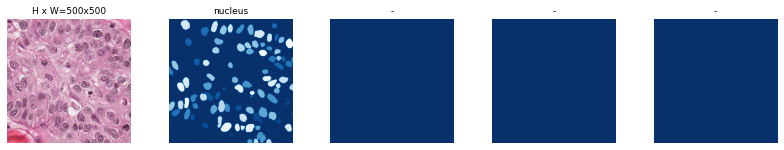

In [ ]:
# Load and display random samples
# Load and display random samples
#image_ids = np.random.choice(dataset_train.image_ids, 4)

image = dataset_train.load_image(0)
mask, class_ids = dataset_train.load_mask(0)
print(0, len(class_ids),dataset_train.class_names)
visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

#Data Preprocessing 

Training

In [ ]:
print("Image Count: {}".format(len(dataset_train.image_ids)))
print("Class Count: {}".format(dataset_train.num_classes))
for i, info in enumerate(dataset_train.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 47
Class Count: 2
  0. BG                                                
  1. nucleus                                           


Validation

In [ ]:
print("Image Count: {}".format(len(dataset_val.image_ids)))
print("Class Count: {}".format(dataset_val.num_classes))
for i, info in enumerate(dataset_val.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 12
Class Count: 2
  0. BG                                                
  1. nucleus                                           


molded_image             shape: (256, 256, 3)         min:    2.00000  max:  255.00000  uint8
mask                     shape: (256, 256, 24)        min:    0.00000  max:    1.00000  int64


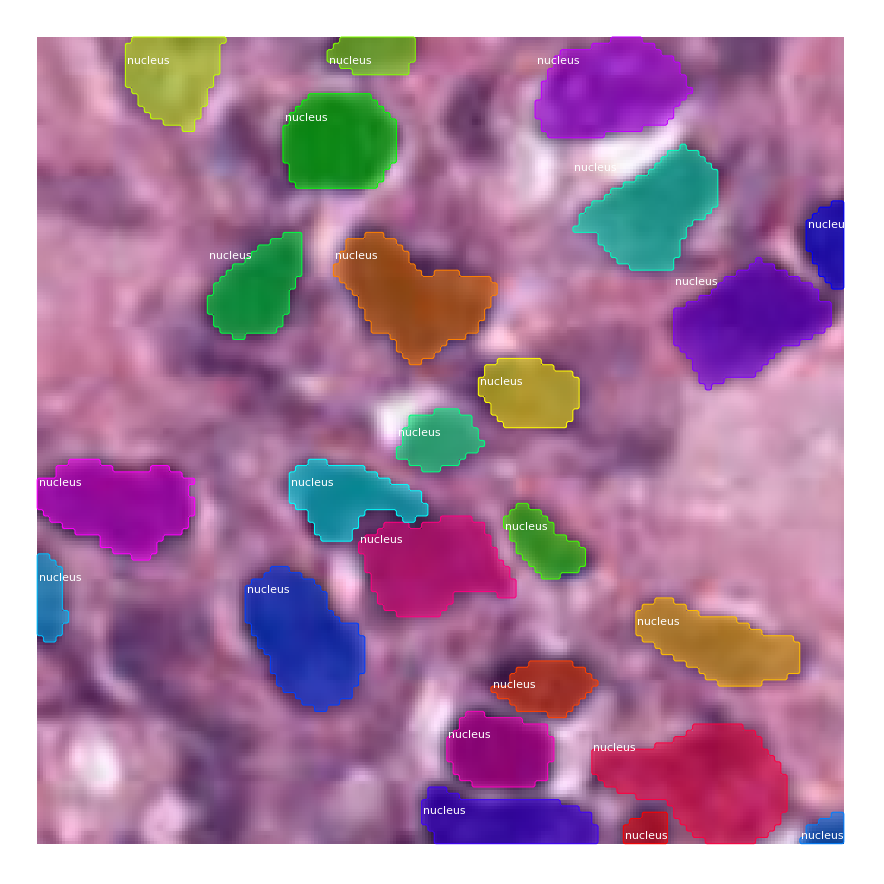

In [ ]:
# Example of loading a specific image by its source ID
source_id = 14

# Map source ID to Dataset image_id
# Notice the nucleus prefix: it's the name given to the dataset in NucleusDataset
image_id = dataset_train.image_from_source_map["nucleus.{}".format(source_id)]

# Load and display
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
        dataset_train, config, image_id, use_mini_mask=False)
log("molded_image", image)
log("mask", mask)
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names,
                            show_bbox=False)

Image Augmentaion

In [ ]:
def compose_image_meta(image_id, original_image_shape, image_shape,
                       window, scale, active_class_ids):
    """Takes attributes of an image and puts them in one 1D array.
    image_id: An int ID of the image. Useful for debugging.
    original_image_shape: [H, W, C] before resizing or padding.
    image_shape: [H, W, C] after resizing and padding
    window: (y1, x1, y2, x2) in pixels. The area of the image where the real
            image is (excluding the padding)
    scale: The scaling factor applied to the original image (float32)
    active_class_ids: List of class_ids available in the dataset from which
        the image came. Useful if training on images from multiple datasets
        where not all classes are present in all datasets.
    """
    meta = np.array(
        [image_id] +                  # size=1
        list(original_image_shape) +  # size=3
        list(image_shape) +           # size=3
        list(window) +                # size=4 (y1, x1, y2, x2) in image cooredinates
        [scale] +                     # size=1
        list(active_class_ids)        # size=num_classes
    )
    return meta

In [ ]:
def load_image_gt(dataset, config, image_id, augment=False, augmentation=None,
                  use_mini_mask=False):
    """Load and return ground truth data for an image (image, mask, bounding boxes).
    augment: (deprecated. Use augmentation instead). If true, apply random
        image augmentation. Currently, only horizontal flipping is offered.
    augmentation: Optional. An imgaug (https://github.com/aleju/imgaug) augmentation.
        For example, passing imgaug.augmenters.Fliplr(0.5) flips images
        right/left 50% of the time.
    use_mini_mask: If False, returns full-size masks that are the same height
        and width as the original image. These can be big, for example
        1024x1024x100 (for 100 instances). Mini masks are smaller, typically,
        224x224 and are generated by extracting the bounding box of the
        object and resizing it to MINI_MASK_SHAPE.
    Returns:
    image: [height, width, 3]
    shape: the original shape of the image before resizing and cropping.
    class_ids: [instance_count] Integer class IDs
    bbox: [instance_count, (y1, x1, y2, x2)]
    mask: [height, width, instance_count]. The height and width are those
        of the image unless use_mini_mask is True, in which case they are
        defined in MINI_MASK_SHAPE.
    """
    # Load image and mask
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    original_shape = image.shape
    image, window, scale, padding, crop = utils.resize_image(
        image,
        min_dim=config.IMAGE_MIN_DIM,
        min_scale=config.IMAGE_MIN_SCALE,
        max_dim=config.IMAGE_MAX_DIM,
        mode=config.IMAGE_RESIZE_MODE)
    mask = utils.resize_mask(mask, scale, padding, crop)

    # Random horizontal flips.
    # TODO: will be removed in a future update in favor of augmentation
    if augment:
        #logging.warning("'augment' is deprecated. Use 'augmentation' instead.")
        if random.randint(0, 1):
            image = np.fliplr(image)
            mask = np.fliplr(mask)

    # Augmentation
    # This requires the imgaug lib (https://github.com/aleju/imgaug)
    image2 = image
    mask2 = mask

    _idx2 = np.sum(mask2, axis=(0, 1)) > 0
    mask2 = mask2[:, :, _idx2]
    class_ids2 = class_ids[_idx2]
    bbox2 = utils.extract_bboxes(mask2)
    if augmentation:
        import imgaug

        # Augmenters that are safe to apply to masks
        # Some, such as Affine, have settings that make them unsafe, so always
        # test your augmentation on masks
        MASK_AUGMENTERS = ["Sequential", "SomeOf", "OneOf", "Sometimes",
                           "Fliplr", "Flipud", "CropAndPad",
                           "Affine", "PiecewiseAffine"]

        def hook(images, augmenter, parents, default):
            """Determines which augmenters to apply to masks."""
            return augmenter.__class__.__name__ in MASK_AUGMENTERS

        # Store shapes before augmentation to compare
        image_shape = image.shape
        mask_shape = mask.shape
       
        # Make augmenters deterministic to apply similarly to images and masks
        det = augmentation.to_deterministic()
        image = det.augment_image(image)
        # Change mask to np.uint8 because imgaug doesn't support np.bool
        mask = det.augment_image(mask.astype(np.uint8),
                                 hooks=imgaug.HooksImages(activator=hook))
        # Verify that shapes didn't change
        assert image.shape == image_shape, "Augmentation shouldn't change image size"
        assert mask.shape == mask_shape, "Augmentation shouldn't change mask size"
        # Change mask back to bool
        mask = mask.astype(np.bool)

    # Note that some boxes might be all zeros if the corresponding mask got cropped out.
    # and here is to filter them out
    _idx = np.sum(mask, axis=(0, 1)) > 0
    mask = mask[:, :, _idx]
    class_ids = class_ids[_idx]
    # Bounding boxes. Note that some boxes might be all zeros
    # if the corresponding mask got cropped out.
    # bbox: [num_instances, (y1, x1, y2, x2)]
    bbox = utils.extract_bboxes(mask)

    # Active classes
    # Different datasets have different classes, so track the
    # classes supported in the dataset of this image.
    active_class_ids = np.zeros([dataset.num_classes], dtype=np.int32)
    source_class_ids = dataset.source_class_ids[dataset.image_info[image_id]["source"]]
    active_class_ids[source_class_ids] = 1

    # Resize masks to smaller size to reduce memory usage
    if use_mini_mask:
        mask = utils.minimize_mask(bbox, mask, config.MINI_MASK_SHAPE)

    # Image meta data
    image_meta = compose_image_meta(image_id, original_shape, image.shape,
                                    window, scale, active_class_ids)

    return image, image_meta, class_ids, bbox, mask, image2, mask2, bbox2, class_ids2

In [ ]:
from imgaug import augmenters as iaa

augmentation = iaa.Sometimes(0.9, [
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.Multiply((0.8, 1.2)),
    iaa.GaussianBlur(sigma=(0.0, 5.0))
])

In [ ]:
limit = 4
ax = get_ax(rows=2, cols=limit//2)
data_dic = {}
for i in range(limit):
    image, image_meta, class_ids, bbox, mask, orimage, ormask, orbbox, orclass = load_image_gt(
        dataset_train, config, image_id, use_mini_mask=False, augment=False, augmentation=augmentation)
    data_dic["image"+str(i)] = image
    data_dic["orimage"+str(i)] = orimage
    data_dic["mask"+str(i)] = mask
    data_dic["maks2"+str(i)] = ormask
    data_dic["class_ids"+str(i)] = class_ids
    data_dic["orclass_ids"+str(i)] = orclass
    data_dic["bbox"+str(i)] = bbox
    data_dic["orbbox"+str(i)] = orbbox

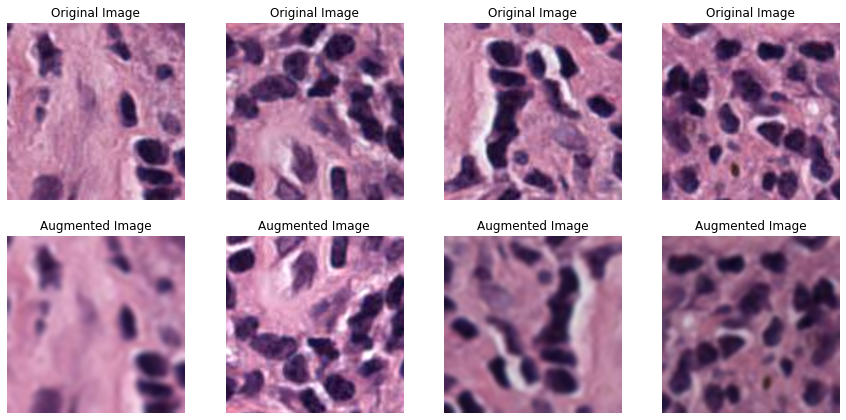

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(441)
plt.title('Original Image')
plt.imshow(data_dic['orimage0'])
plt. axis('off')
plt.subplot(442)
plt.title('Original Image')
plt.imshow(data_dic['orimage1'])
plt. axis('off')
plt.subplot(443)
plt.title('Original Image')
plt.imshow(data_dic['orimage2'])
plt. axis('off')
plt.subplot(444)
plt.title('Original Image')
plt.imshow(data_dic['orimage3'])
plt. axis('off')
plt.subplot(445)
plt.title('Augmented Image')
plt.imshow(data_dic['image0'])
plt. axis('off')
plt.subplot(446)
plt.title('Augmented Image')
plt.imshow(data_dic['image1'])
plt. axis('off')
plt.subplot(447)
plt.title('Augmented Image')
plt.imshow(data_dic['image2'])
plt. axis('off')
plt.subplot(448)
plt.title('Augmented Image')
plt.imshow(data_dic['image3'])
plt. axis('off')
plt.savefig("Instance seg augmentation.png")
plt.show()

#ResNet

In [ ]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


Fine Tuning on COCO

In [ ]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last()[1], by_name=True)

In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE, 
            epochs=20, 
            layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/CV Project/Mask_RCNN/Mask_RCNN/logs/nucleus20220612T2144/mask_rcnn_nucleus_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4 

/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor





/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2039: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/20
24/25 [===========================>..] - ETA: 9s - loss: 3.4331 - rpn_class_loss: 0.2311 - rpn_bbox_loss: 1.4966 - mrcnn_class_loss: 0.4182 - mrcnn_bbox_loss: 0.6756 - mrcnn_mask_loss: 0.6116 

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2197: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'



25/25 [==============================] - 585s 23s/step - loss: 3.3421 - rpn_class_loss: 0.2251 - rpn_bbox_loss: 1.4797 - mrcnn_class_loss: 0.4015 - mrcnn_bbox_loss: 0.6486 - mrcnn_mask_loss: 0.5872 - val_loss: 2.6007 - val_rpn_class_loss: 0.1939 - val_rpn_bbox_loss: 1.1520 - val_mrcnn_class_loss: 0.1018 - val_mrcnn_bbox_loss: 0.6628 - val_mrcnn_mask_loss: 0.4901
Epoch 2/20
25/25 [==============================] - 369s 15s/step - loss: 2.4313 - rpn_class_loss: 0.1734 - rpn_bbox_loss: 1.0728 - mrcnn_class_loss: 0.1245 - mrcnn_bbox_loss: 0.6038 - mrcnn_mask_loss: 0.4567 - val_loss: 2.6873 - val_rpn_class_loss: 0.1432 - val_rpn_bbox_loss: 1.4524 - val_mrcnn_class_loss: 0.0689 - val_mrcnn_bbox_loss: 0.6388 - val_mrcnn_mask_loss: 0.3839
Epoch 3/20
25/25 [==============================] - 395s 16s/step - loss: 2.4385 - rpn_class_loss: 0.1686 - rpn_bbox_loss: 1.1346 - mrcnn_class_loss: 0.1177 - mrcnn_bbox_loss: 0.5487 - mrcnn_mask_loss: 0.4688 - val_loss: 2.0907 - val_rpn_class_loss: 0.1278 -

In [ ]:
#save weights
model_path = os.path.join(MODEL_DIR, "mask_rcnn_nucleus.h5")
model.keras_model.save_weights(model_path)

## Detection

In [ ]:
class InferenceConfig(NucleusConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = NucleusConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(MODEL_DIR, "mask_rcnn_nucleus.h5")
#model_path = model.find_last()[1]

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/drive/MyDrive/CV Project/Mask_RCNN/Mask_RCNN/logs/mask_rcnn_nucleus.h5


original_image           shape: (128, 128, 3)         min:   39.00000  max:  254.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max:  600.00000  float64
gt_class_id              shape: (3,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (3, 4)                min:    0.00000  max:  128.00000  int32
gt_mask                  shape: (128, 128, 3)         min:    0.00000  max:    1.00000  int64


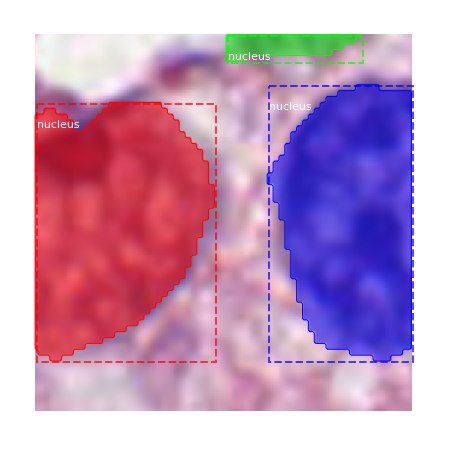

In [ ]:
# Test on a random image
image_id = 2 #random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

Processing 1 images
image                    shape: (128, 128, 3)         min:   39.00000  max:  254.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min:   10.44000  max:  208.47000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  128.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -0.71267  max:    1.20874  float32


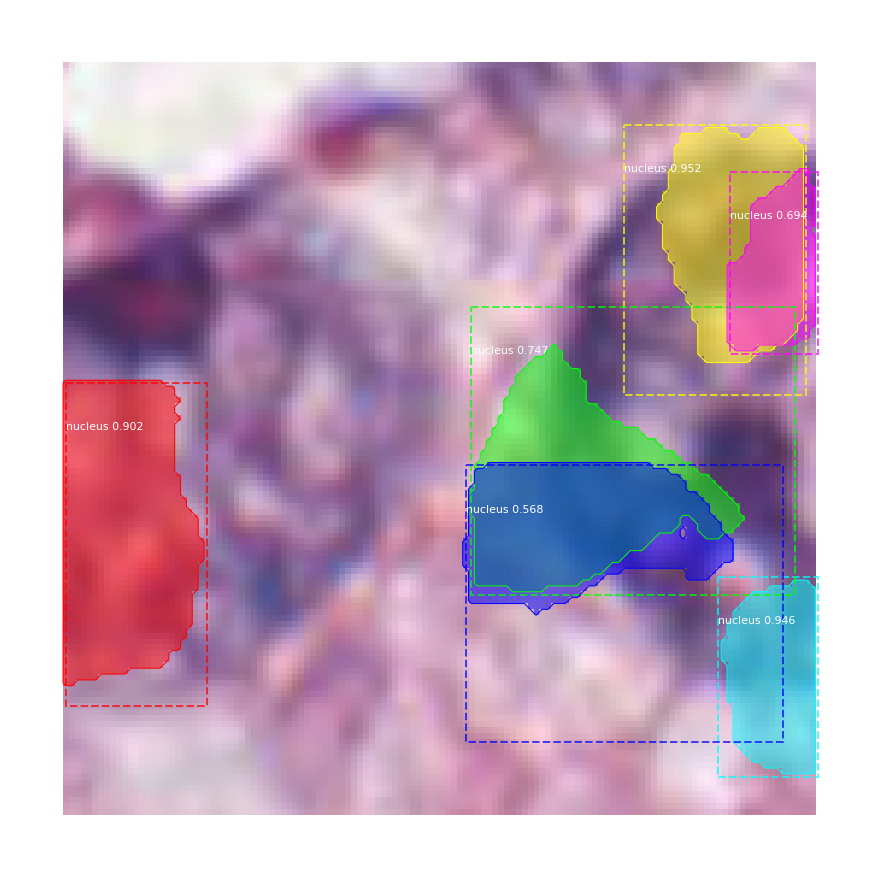

In [ ]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'])

## Evaluation

In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 30 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_val.image_ids, 10)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

/content/drive/MyDrive/CV Project/Mask_RCNN/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)
/content/drive/MyDrive/CV Project/Mask_RCNN/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)


mAP:  nan


In [ ]:
test_ids = []
length3 = test.shape[0]
for x in range(0, length3):
  test_ids.append(x)

In [ ]:

X_test = np.zeros((len(test_ids), config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1], 3), dtype=np.uint8)
sizes_test = []
_test_ids = []

print('Getting and resizing test images ... ')
#sys.stdout.flush()
for n, id_ in enumerate(test_ids):
    _test_ids.append([id_])
    #path = TEST_PATH + id_
    img = imread(test.loc[n]["Images"])[:,:,:3]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1]), mode='constant', preserve_range=True)
    X_test[n] = img

Getting and resizing test images ... 


checking a test image with masks ...
Processing 1 images
image                    shape: (128, 128, 3)         min:    4.00000  max:  245.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min:  -25.56000  max:  190.47000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  128.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -0.71267  max:    1.20874  float32


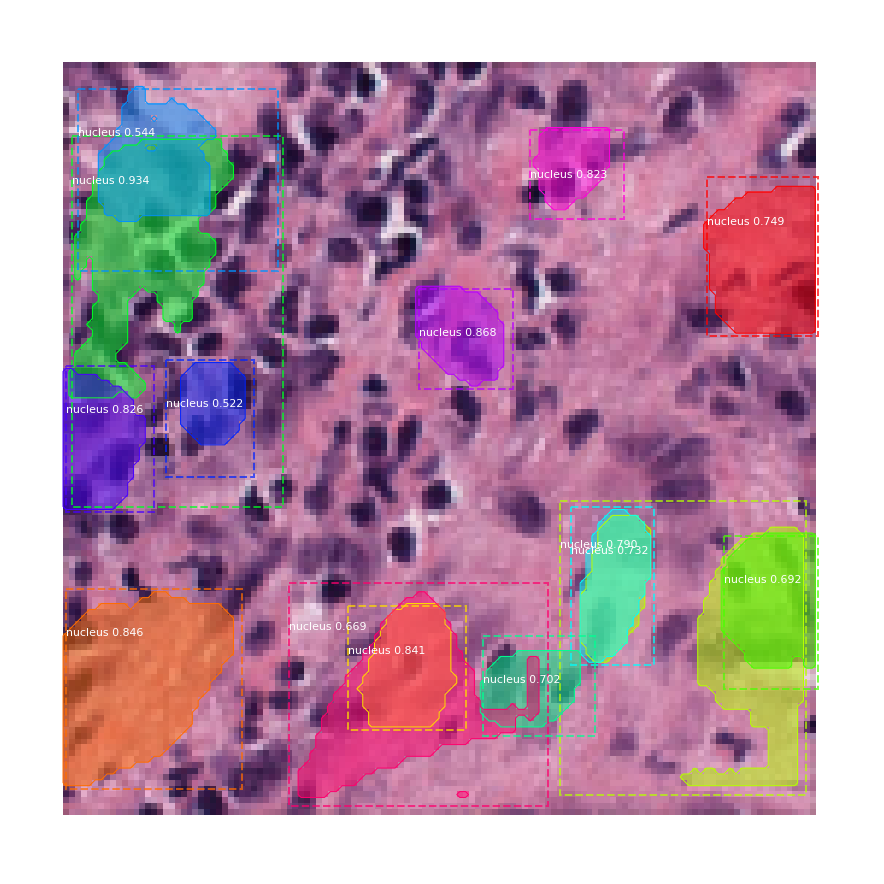

In [ ]:
print("checking a test image with masks ...")
results = model.detect([X_test[20]], verbose=1)

r = results[0]
visualize.display_instances(X_test[20], r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'])


In [ ]:
def get_dice_1(true, pred):
    """Traditional dice."""
    # cast to binary 1st
    true = np.copy(true)
    pred = np.copy(pred)
    true[true > 0] = 1
    pred[pred > 0] = 1
    inter = true * pred
    denom = true + pred
    return 2.0 * np.sum(inter) / np.sum(denom)

In [ ]:
def jaccard_distance(y_true, y_pred, smooth=100):
    """ Calculates mean of Jaccard distance as a loss function """
    intersection = tf.reduce_sum(y_true * y_pred, axis=(1,2))
    sum_ = tf.reduce_sum(y_true + y_pred, axis=(1,2))
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    jd =  (1 - jac) * smooth
    return tf.reduce_mean(jd)

#MobileNet

In [ ]:
class NucleusConfig(Config):
    """Configuration for training on the nucleus segmentation dataset."""
    # Give the configuration a recognizable name
    NAME = "nucleus"

    # Adjust depending on your GPU memory
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + nucleus

    # Number of training and validation steps per epoch
    STEPS_PER_EPOCH = 25
    VALIDATION_STEPS = 15

    # Don't exclude based on confidence. Since we have two classes
    # then 0.5 is the minimum anyway as it picks between nucleus and BG
    DETECTION_MIN_CONFIDENCE = 0

    # Backbone network architecture
    # Supported values are: resnet50, resnet101
    # BACKBONE = "resnet50"
    BACKBONE = "mobilenet224v1"


    # Input image resizing
    # Random crops of size 512x512
    IMAGE_RESIZE_MODE = "crop"
    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128
    IMAGE_MIN_SCALE = 2.0

    # Length of square anchor side in pixels
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)

    # ROIs kept after non-maximum supression (training and inference)
    POST_NMS_ROIS_TRAINING = 1000
    POST_NMS_ROIS_INFERENCE = 2000

    # Non-max suppression threshold to filter RPN proposals.
    # You can increase this during training to generate more propsals.
    RPN_NMS_THRESHOLD = 0.9

    # How many anchors per image to use for RPN training
    RPN_TRAIN_ANCHORS_PER_IMAGE = 64

    # Image mean (RGB)
    MEAN_PIXEL = np.array([43.53, 39.56, 48.22])

    # If enabled, resizes instance masks to a smaller size to reduce
    # memory load. Recommended when using high-resolution images.
    USE_MINI_MASK = True
    MINI_MASK_SHAPE = (56, 56)  # (height, width) of the mini-mask

    # Number of ROIs per image to feed to classifier/mask heads
    # The Mask RCNN paper uses 512 but often the RPN doesn't generate
    # enough positive proposals to fill this and keep a positive:negative
    # ratio of 1:3. You can increase the number of proposals by adjusting
    # the RPN NMS threshold.
    TRAIN_ROIS_PER_IMAGE = 128

    # Maximum number of ground truth instances to use in one image
    MAX_GT_INSTANCES = 200

    # Max number of final detections per image
    DETECTION_MAX_INSTANCES = 400

config = NucleusConfig()
config.display()


  


Configurations:
BACKBONE                       mobilenet224v1
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              crop
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

In [ ]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

Fine Tuning on COCO

In [ ]:
COCO_MODEL_PATH = "/content/drive/MyDrive/CV Project/Mask_RCNN/Mobile_correct/Mask_RCNN/mobile_mask_rcnn_coco.h5"

In [ ]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last()[1], by_name=True)

In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE, 
            epochs=2, 
            layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/CV Project/Mask_RCNN/Mobile_correct/Mask_RCNN/logs/nucleus20220613T0910/mask_rcnn_nucleus_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mr

/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2039: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers 

Epoch 1/2
24/25 [===========================>..] - ETA: 28s - loss: 2.7804 - rpn_class_loss: 0.1173 - rpn_bbox_loss: 1.1538 - mrcnn_class_loss: 0.3537 - mrcnn_bbox_loss: 0.5600 - mrcnn_mask_loss: 0.5956

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2197: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


25/25 [==============================] - 1032s 41s/step - loss: 2.7845 - rpn_class_loss: 0.1204 - rpn_bbox_loss: 1.1601 - mrcnn_class_loss: 0.3513 - mrcnn_bbox_loss: 0.5542 - mrcnn_mask_loss: 0.5985 - val_loss: 2.5882 - val_rpn_class_loss: 0.1011 - val_rpn_bbox_loss: 1.0898 - val_mrcnn_class_loss: 0.2619 - val_mrcnn_bbox_loss: 0.5694 - val_mrcnn_mask_loss: 0.5659
Epoch 2/2
25/25 [==============================] - 961s 38s/step - loss: 2.5959 - rpn_class_loss: 0.0879 - rpn_bbox_loss: 0.9380 - mrcnn_class_loss: 0.3275 - mrcnn_bbox_loss: 0.6177 - mrcnn_mask_loss: 0.6247 - val_loss: 2.3335 - val_rpn_class_loss: 0.0766 - val_rpn_bbox_loss: 0.8828 - val_mrcnn_class_loss: 0.2813 - val_mrcnn_bbox_loss: 0.5498 - val_mrcnn_mask_loss: 0.5429


In [ ]:
#save weights
model_path = os.path.join(MODEL_DIR, "mask_rcnn_nucleus_mobile.h5")
model.keras_model.save_weights(model_path)

## Detection

In [ ]:
class InferenceConfig(NucleusConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = NucleusConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(MODEL_DIR, "mask_rcnn_nucleus_mobile.h5")
#model_path = model.find_last()[1]

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/drive/MyDrive/CV Project/Mask_RCNN/Mobile_correct/Mask_RCNN/logs/mask_rcnn_nucleus_mobile.h5


original_image           shape: (128, 128, 3)         min:   39.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max:  600.00000  float64
gt_class_id              shape: (2,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (2, 4)                min:    0.00000  max:  128.00000  int32
gt_mask                  shape: (128, 128, 2)         min:    0.00000  max:    1.00000  int64


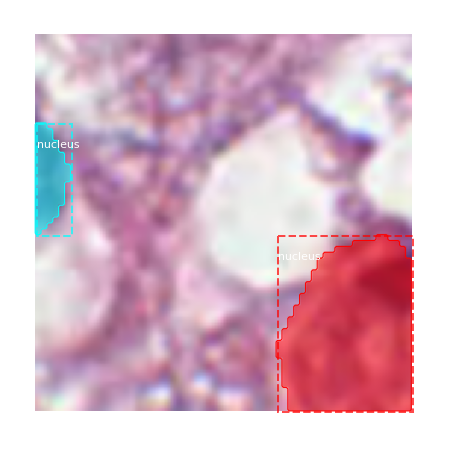

In [ ]:
# Test on a random image
image_id = 2 #random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

Processing 1 images
image                    shape: (128, 128, 3)         min:   39.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min:   -0.67059  max:    0.98431  float32
image_metas              shape: (1, 14)               min:    0.00000  max:  128.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -0.71267  max:    1.20874  float32


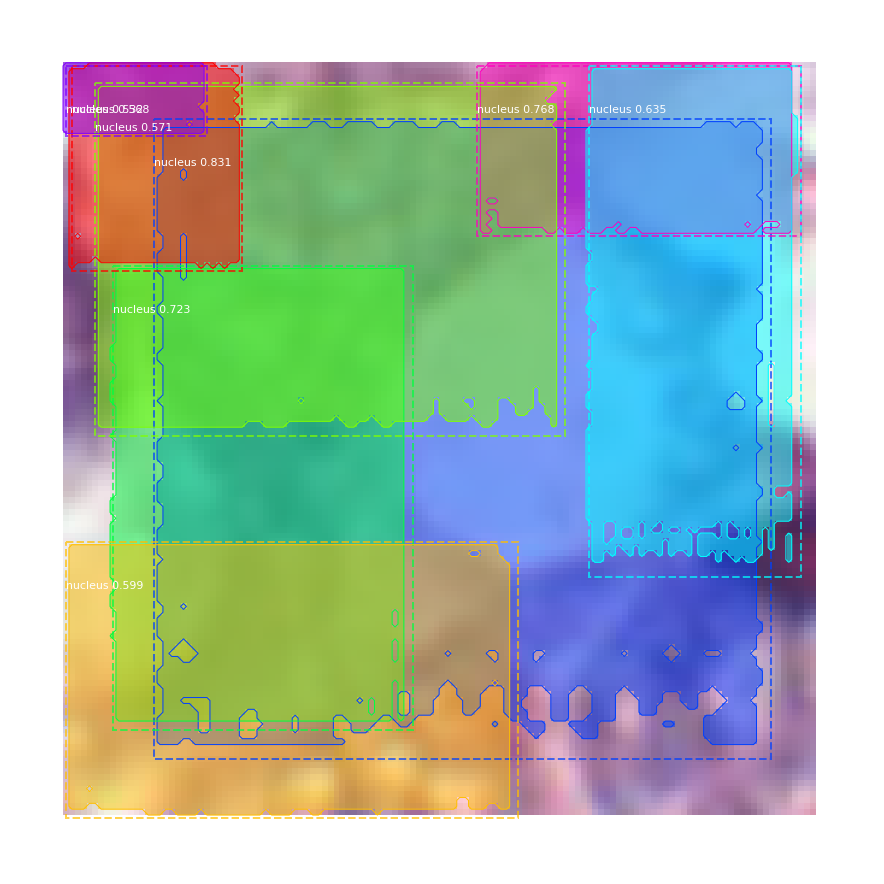

In [ ]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'])

## Evaluation

In [ ]:
test_ids = []
length3 = test.shape[0]
for x in range(0, length3):
  test_ids.append(x)

In [ ]:

X_test = np.zeros((len(test_ids), config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1], 3), dtype=np.uint8)
sizes_test = []
_test_ids = []

print('Getting and resizing test images ... ')
#sys.stdout.flush()
for n, id_ in enumerate(test_ids):
    _test_ids.append([id_])
    #path = TEST_PATH + id_
    img = imread(test.loc[n]["Images"])[:,:,:3]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1]), mode='constant', preserve_range=True)
    X_test[n] = img

Getting and resizing test images ... 


checking a test image with masks ...
Processing 1 images
image                    shape: (128, 128, 3)         min:    4.00000  max:  245.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min:   -0.92157  max:    0.83529  float32
image_metas              shape: (1, 14)               min:    0.00000  max:  128.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -0.71267  max:    1.20874  float32


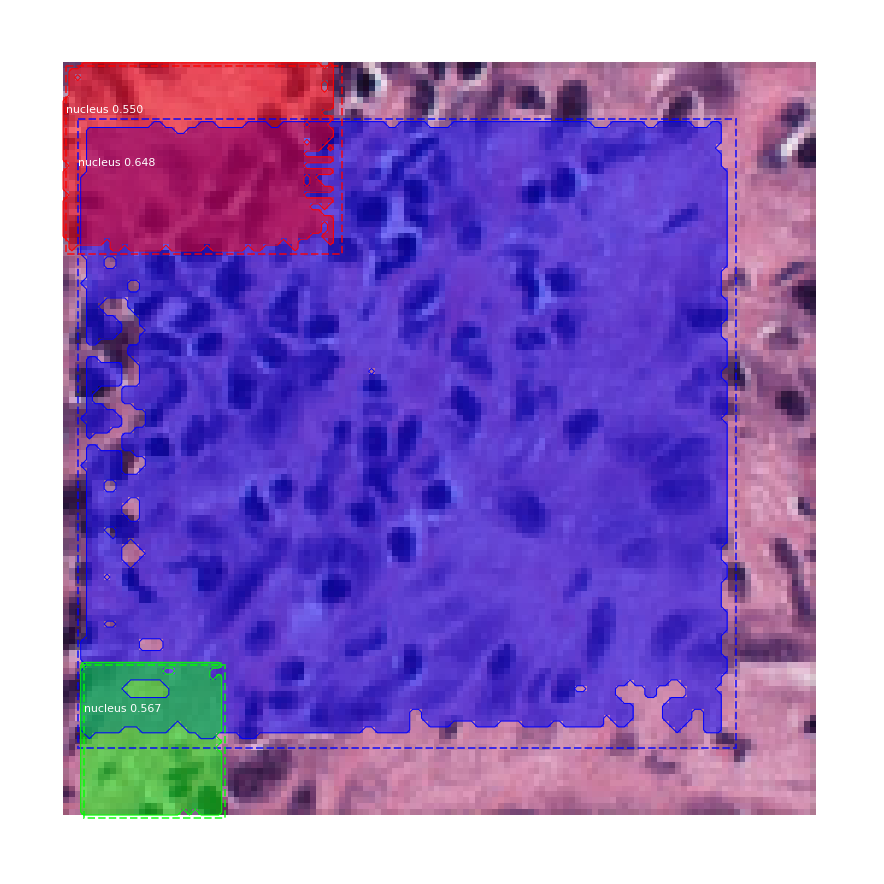

In [ ]:
print("checking a test image with masks ...")
results = model.detect([X_test[20]], verbose=1)

r = results[0]
visualize.display_instances(X_test[20], r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'])
